<b>The goal of this project is to use moving averages for short and long terms to visualize and get signal for stock trend change – when the stock price crosses the long term downwards this is usually a sign for a bearish stock – hence we need to sell, while when the stock price crosses the long term upwards this is usually a sign for a bullish market, hence we need to buy. This allows us to get a buy or sell signal with moving averages. In this project I will get buy and sell signals for Tesla (TSLA) stock.</b>

In [1]:
import numpy as np
import pandas as pd

#Data Source
import yfinance as yf

#Data viz
import plotly.graph_objs as go

In [2]:
data = yf.download(tickers='TSLA', period='5y', interval='1d')

[*********************100%***********************]  1 of 1 completed


In [3]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-02-16,55.520000,56.000000,53.700001,53.790001,53.790001,35386500
2017-02-17,53.160000,54.577999,52.830002,54.445999,54.445999,31285500
2017-02-21,55.090000,56.279999,54.801998,55.478001,55.478001,28383500
2017-02-22,56.062000,56.689999,54.520000,54.702000,54.702000,43775000
2017-02-23,52.799999,52.931999,51.112000,51.198002,51.198002,74576000
...,...,...,...,...,...,...
2022-02-09,935.000000,946.270020,920.000000,932.000000,932.000000,17419800
2022-02-10,908.369995,943.809998,896.700012,904.549988,904.549988,22042300
2022-02-11,909.630005,915.960022,850.700012,860.000000,860.000000,26492700


In [4]:
sma_30 = pd.DataFrame()
sma_30['Adj_close'] = data['Adj Close'].rolling(window=30).mean()
sma_30.head(60)

,Adj_close
Date,
2017-02-16,NaN
2017-02-17,NaN
2017-02-21,NaN
2017-02-22,NaN
2017-02-23,NaN
2017-02-24,NaN
2017-02-27,NaN
2017-02-28,NaN
2017-03-01,NaN


In [5]:
sma_100 = pd.DataFrame()
sma_100['Adj_close'] = data['Adj Close'].rolling(window=100).mean()
sma_100

,Adj_close
Date,
2017-02-16,NaN
2017-02-17,NaN
2017-02-21,NaN
2017-02-22,NaN
2017-02-23,NaN
...,...
2022-02-09,978.861298
2022-02-10,980.605098
2022-02-11,981.811298


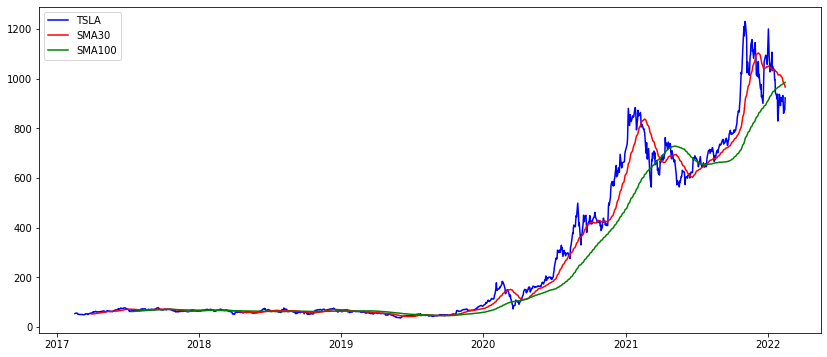

In [6]:
import matplotlib.pyplot as plt
import pylab as pl

pl.figure(figsize=(14,6))
pl.plot(data.index,data['Adj Close'],label='TSLA',color="b")
pl.plot(sma_30.index,sma_30['Adj_close'], label='SMA30',color="r")
pl.plot(sma_100.index,sma_100['Adj_close'],label='SMA100', color="g")
pl.legend(loc="best")

pl.show()

In [7]:
data['Adj Close']

Date
2017-02-16     53.790001
2017-02-17     54.445999
2017-02-21     55.478001
2017-02-22     54.702000
2017-02-23     51.198002
                 ...    
2022-02-09    932.000000
2022-02-10    904.549988
2022-02-11    860.000000
2022-02-14    875.760010
2022-02-15    922.429993
Name: Adj Close, Length: 1259, dtype: float64

In [8]:
# Create a dataframe of all adj close prices
udata = pd.DataFrame(index=data.index)
#udata['Date'] = data.index
udata['stock_adj_close'] = data['Adj Close']
udata['SMA_30'] = sma_30['Adj_close']
udata['SMA_100']= sma_100['Adj_close']

In [9]:
udata

,stock_adj_close,SMA_30,SMA_100
Date,,,
2017-02-16,53.790001,NaN,NaN
2017-02-17,54.445999,NaN,NaN
2017-02-21,55.478001,NaN,NaN
2017-02-22,54.702000,NaN,NaN
2017-02-23,51.198002,NaN,NaN
...,...,...,...
2022-02-09,932.000000,994.312996,978.861298
2022-02-10,904.549988,988.258331,980.605098
2022-02-11,860.000000,981.246999,981.811298


In [10]:
udata.reset_index(inplace=True)

In [11]:
udata

,Date,stock_adj_close,SMA_30,SMA_100
0,2017-02-16,53.790001,NaN,NaN
1,2017-02-17,54.445999,NaN,NaN
2,2017-02-21,55.478001,NaN,NaN
3,2017-02-22,54.702000,NaN,NaN
4,2017-02-23,51.198002,NaN,NaN
...,...,...,...,...
1254,2022-02-09,932.000000,994.312996,978.861298
1255,2022-02-10,904.549988,988.258331,980.605098
1256,2022-02-11,860.000000,981.246999,981.811298
1257,2022-02-14,875.760010,975.212998,983.049498


In [12]:
#Create a Function to signal when to buy and sell
def buy_sell_fun(data):
    sig_price_buy = []
    sig_price_sell = []
    flag = -1

    for i in range(len(data)):
        if data['SMA_30'][i] > data['SMA_100'][i]:
            if flag != 1:
                sig_price_buy.append(data['stock_adj_close'][i])
                sig_price_sell.append(np.nan)
                flag = 1
            else:
                sig_price_buy.append(np.nan)
                sig_price_sell.append(np.nan)
        elif data['SMA_30'][i] < data['SMA_100'][i]:
            if flag !=0:
                sig_price_buy.append(np.nan)
                sig_price_sell.append(data['stock_adj_close'][i])
                flag = 0
            else:
                sig_price_buy.append(np.nan)
                sig_price_sell.append(np.nan)
        else:
            sig_price_buy.append(np.nan)
            sig_price_sell.append(np.nan)

    return (sig_price_buy, sig_price_sell)

In [13]:
def chart_data(data,stock):
    #store the buy and sell data into a variable
    buy_sell = buy_sell_fun(data)
    data['buy_signal_price'] = buy_sell[0]
    data['sell_signal_price']=buy_sell[1]

    #Looking for the dates of the buy signals
    buy_dates = data.loc[data['buy_signal_price']>0]

    #Looking for the dates of the sell signals
    sell_dates = data.loc[data['sell_signal_price']>0]

    #Dropping uneccessary columns
    buy_dates.drop(columns = ['sell_signal_price', 'SMA_30', 'SMA_100'], inplace = True)
    sell_dates.drop(columns = ['buy_signal_price', 'SMA_30', 'SMA_100'], inplace = True)

    # DF of dates with prices
    dates = pd.concat([buy_dates, sell_dates],sort = True)

    # Now to organize by the dates, drop adj_close price column, and make date the index
    dates.sort_values(by = 'Date', inplace = True)
    dates.drop(columns = ['stock_adj_close'],inplace = True)
    dates.set_index('Date', inplace = True)

    #visualize data and strategy to buy and sell stock
    ab = plt.figure(figsize=(20,12))
    combined = data.copy()
    combined.Date = pd.to_datetime(combined.Date).dt.strftime('%b %d %Y')
    last_date = combined['Date'].iloc[-1]
    first_date = combined['Date'].iloc[0]
    plt.plot(data['stock_adj_close'],label = 'PMAC', alpha = 0.35)
    plt.plot(data['SMA_30'], label = 'SMA30', alpha = 0.35)
    plt.plot(data['SMA_100'],label = 'SMA100', alpha = 0.35)
    plt.scatter(data.index, data['buy_signal_price'],label = 'Buy',marker = '^', color = 'green')
    plt.scatter(data.index, data['sell_signal_price'], label = 'Sell', marker = 'v', color = 'red')
    plt.title('{} adj close price history buy and sell signals'.format(stock))
    plt.xlabel('{} - {}'.format(first_date, last_date))
    plt.ylabel('Adj close price USD')
    plt.legend()
    plt.show()
    print(dates)

In [14]:
buy_sell_fun(udata)

([nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  65.44400024414062,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,

/var/folders/gw/vxqmwd8s7hlczjd80y61sph40000gn/T/ipykernel_46795/4070760451.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buy_dates.drop(columns = ['sell_signal_price', 'SMA_30', 'SMA_100'], inplace = True)
/var/folders/gw/vxqmwd8s7hlczjd80y61sph40000gn/T/ipykernel_46795/4070760451.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sell_dates.drop(columns = ['buy_signal_price', 'SMA_30', 'SMA_100'], inplace = True)


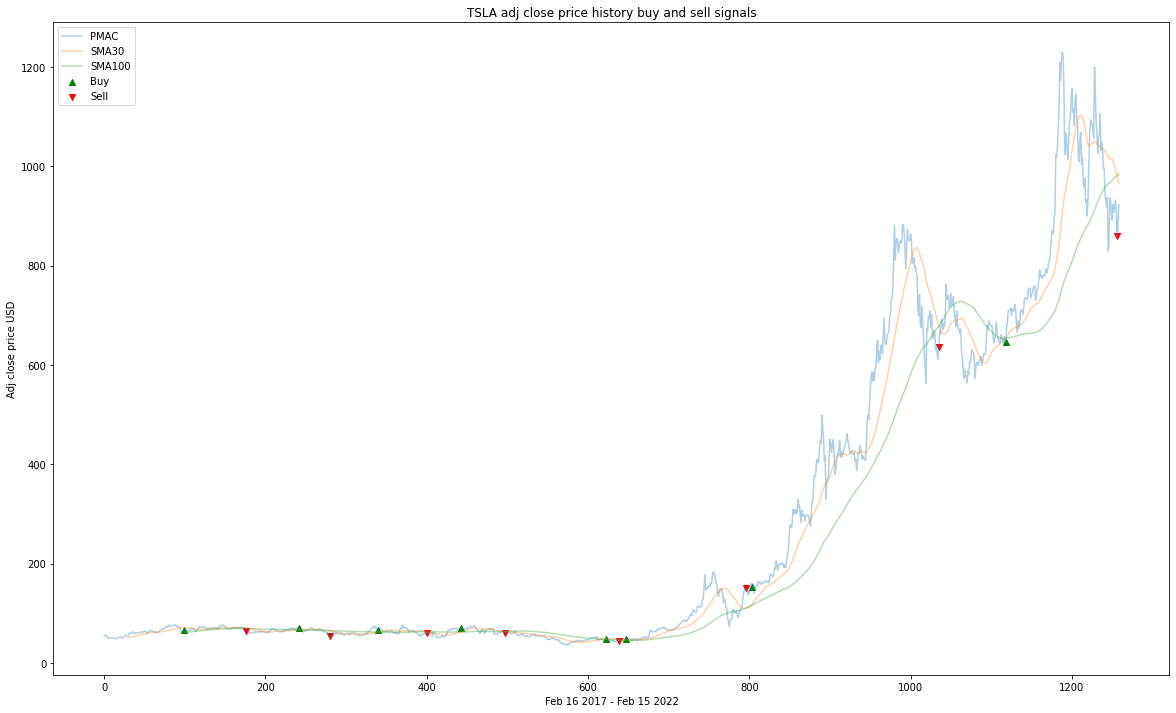

            buy_signal_price  sell_signal_price
Date                                           
2017-07-11         65.444000                NaN
2017-10-27               NaN          64.174004
2018-02-01         69.849998                NaN
2018-03-29               NaN          53.226002
2018-06-25         66.601997                NaN
2018-09-19               NaN          59.804001
2018-11-19         70.694000                NaN
2019-02-08               NaN          61.160000
2019-08-08         47.660000                NaN
2019-08-30               NaN          45.122002
2019-09-13         49.040001                NaN
2020-04-17               NaN         150.778000
2020-04-28        153.824005                NaN
2021-03-30               NaN         635.619995
2021-07-28        646.979980                NaN
2022-02-11               NaN         860.000000


In [15]:
chart_data(udata,'TSLA')